# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Pandas for data handling
import pandas as pd

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Shashikanth Senthil Kumar"
student_id = "25218722"
group_id = "9"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
business_use_case_description = """
Apply a gradient boosting approach optimized for speed and efficiency. 
LightGBM is expected to handle large-scale, high-dimensional data efficiently while maintaining high accuracy. 
Its leaf-wise tree growth and histogram-based learning make it suitable for datasets with many categorical 
and numerical features.

Hypothesis:
LightGBM will achieve comparable or better ROC AUC and F1 scores than Random Forest , 
while reducing training time significantly. This makes it an effective choice for rapid experimentation 
and production deployment where scalability and speed are critical.
"""


In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
business_objectives = """
Accurate results will allow teams to prioritize scouting resources toward players with a higher probability of being drafted, improving the quality of draft selections and reducing wasted time and investment. 
Incorrect results, however, may cause teams to overlook valuable players or over-invest in players with a low chance of success, leading to financial loss, missed opportunities, and reduced team performance.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
stakeholders_expectations_explanations = """
The results will be used to guide scouting and recruitment strategies.
The primary users of the predictions will be NBA teams, talent scouts, sports analysts, and team management. 
Indirectly, players themselves and their agents may also be impacted, as draft predictions can influence career opportunities, negotiations, and visibility in the draft process.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# Load the datasets
X_train = pd.read_csv('../data_shash/X_train.csv')
y_train = pd.read_csv('../data_shash/y_train.csv')
X_val = pd.read_csv('../data_shash/X_val.csv')
y_val = pd.read_csv('../data_shash/y_val.csv')
X_test = pd.read_csv('../data_shash/X_test.csv')
y_test = pd.read_csv('../data_shash/y_test.csv')

---
## D. Feature Selection


### D.1 Final Selection of Features

In [15]:
# The final selected features are
features_list = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'ht', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'player_id', 'drafted'] 

### D.2 Final Selection of Features after feature engineering

In [16]:
# The final features after feature engineering
final_features = ['GP', 'Ortg', 'usg', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per',
       'FT_per', 'twoP_per', 'TPM', 'TP_per', 'stl_per', 'ftr', 'porpag',
       'bpm', 'gbpm', 'blk', 'pts', 'height_cm','Height_Impact', 'REB_per', 
       'FT_efficiency', 'player_id', 'drafted']

In [17]:
feature_selection_explanations = """
We are using the same set of features as in Experiment 0 to maintain consistency and to ensure that model performance variations are due to the logistic regression model and not from feature changes.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Use Datacheck to Ensure there is no Null values in the Datasets

In [19]:
# Import custom data checking function
from shash import datacheck

In [20]:
datacheck(X_train)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,41
Ortg,float64,0,0.0,1236
REB_per,float64,0,0.0,684
Height_Impact,float64,0,0.0,9781
height_cm,float64,0,0.0,30
pts,float64,0,0.0,3121
blk,float64,0,0.0,646
gbpm,float64,0,0.0,9752
bpm,float64,0,0.0,9747
porpag,float64,0,0.0,9751


In [21]:
datacheck(y_train)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,9780


In [22]:
datacheck(X_val)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,40
Ortg,float64,0,0.0,806
REB_per,float64,0,0.0,473
Height_Impact,float64,0,0.0,2446
height_cm,float64,0,0.0,25
pts,float64,0,0.0,1338
blk,float64,0,0.0,368
gbpm,float64,0,0.0,2445
bpm,float64,0,0.0,2445
porpag,float64,0,0.0,2443


In [23]:
datacheck(y_val)

,dtype,missing_count,missing_percent,unique_values
drafted,float64,0,0.0,2
----------------,----------------,----------------,----------------,----------------
Number of,duplicate,rows,present:,2444


In [24]:
datacheck(X_test)

,dtype,missing_count,missing_percent,unique_values
GP,int64,0,0.0,34
Ortg,float64,0,0.0,615
REB_per,float64,0,0.0,399
Height_Impact,float64,0,0.0,1292
height_cm,float64,0,0.0,22
pts,float64,0,0.0,808
blk,float64,0,0.0,244
gbpm,float64,0,0.0,1297
bpm,float64,0,0.0,1297
porpag,float64,0,0.0,1293


In [25]:
datacheck(y_test)

,dtype,missing_count,missing_percent,unique_values
player_id,object,0,0.0,1297
----------------,----------------,----------------,----------------,----------------
No duplicate,rows,found,in the,dataset


In [26]:
data_cleaning_explanations = """
Missing values can lead to inaccuracies in data analysis and model predictions. 
In this dataset, there were no missing values in any of the training, validation, or test sets ensuring completeness and reliability for further analysis.
Ignore the duplicates on test sets as they are reflecting the drafted player status.
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_explanations)

---
## F. Feature Engineering

In [28]:
feature_engineering_explanations = """
For this experiment (the LGBMClassifier), no feature engineering is performed. 
We are using the same features as the baseline model, and thus, no interaction terms or additional features were created. 
This maintains consistency in feature selection and ensures comparability of results between the models.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_explanations)

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Flatten Target Variables"

In [30]:
# Check the shape of the y_train
y_train.shape

(9782, 1)

In [31]:
# Convert y dataframes to 1D arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

In [32]:
# Check the shape of the y_train
y_train.shape

(9782,)

In [33]:
data_transformation_1_explanations = """
The target variable 'drafted' was originally in a column vector shape (n_samples, 1), which is not compatible with many scikit-learn models. 
Flattening the target to a 1-dimensional array ensures proper input format for training and evaluation functions. 
This transformation allows models like Logistic Regression to correctly interpret the labels, avoids warnings during fitting, and ensures consistent behavior across cross-validation and predictions.
"""

In [34]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets


The Datasets are already saved

---
## I. Selection of Performance Metrics


In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, ConfusionMatrixDisplay,
    classification_report
)

In [36]:
performance_metrics_explanations = """
For this NBA draft prediction task, multiple performance metrics are considered to provide a well-rounded evaluation. 
Accuracy alone may not be sufficient, especially if the dataset is imbalanced (i.e., fewer players get drafted compared 
to those who don’t). Therefore, precision, recall, and F1-score are included to better capture the trade-offs between 
false positives and false negatives. 

- Precision: helps us understand how many of the players predicted as drafted are actually drafted, which is important 
  when we want to minimize false positives. 
- Recall tells us how many of the actual drafted players were correctly identified, which is critical if the goal is 
  to avoid missing potential talents. 
- F1-score balances precision and recall, making it a strong overall measure when both false positives and false negatives 
  are costly. 
- ROC-AUC is included to evaluate the model’s ability to discriminate between drafted and not drafted players across 
  different thresholds. 
- Confusion Matrix provides a clear breakdown of true positives, true negatives, false positives, and false negatives 
  for better interpretability. 

Using these combined metrics gives a more complete view of model performance and ensures that the evaluation is not biased 
towards a single aspect of prediction.
"""


In [37]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

---
## J. Train Machine Learning Model

### J.1 Import Algorithm

In [38]:
# Import LightGBM Classifier
from lightgbm import LGBMClassifier

In [39]:
# Initialize the LGBMClassifier with appropriate parameters
lgbm = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    scale_pos_weight= sum(y_train == 0) / sum(y_train == 1),
    random_state=42,
    verbose=-1

)

In [40]:
algorithm_selection_explanations = """
LightGBM is a gradient boosting framework that uses tree-based learning algorithms.
It is fast, handles large datasets, supports categorical features, and provides feature
importance scores for interpretability. It is suitable for binary classification and
imbalanced datasets.
"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [42]:
# Define parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

In [43]:
hyperparameters_selection_explanations = """
These hyperparameters control model complexity, learning, and generalization:
- n_estimators: Number of trees in the ensemble; more trees improve stability but increase computation.
- max_depth: Maximum depth of each tree, controlling overfitting risk.
- learning_rate: Step size for updating weights, balancing speed and accuracy.
- scale_pos_weight: Adjusts for class imbalance, emphasizing drafted players.
"""

In [44]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [45]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [46]:
# GridSearchCV setup with ROC AUC as metric
grid_search_lgb = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgb,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid_search_lgb.fit(X_train, y_train)

# Best model
best_lgb_model = grid_search_lgb.best_estimator_

In [47]:
print("Best Parameters:", grid_search_lgb.best_params_)
print("Best ROC AUC Score (CV):", grid_search_lgb.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best ROC AUC Score (CV): 0.9753328553532983


### J.4 Model Technical Performance

In [48]:
# Get predicted labels
y_pred_train = best_lgb_model.predict(X_train)
y_pred_val = best_lgb_model.predict(X_val)

# Get predicted probabilities (only needed for ROC AUC, log loss, etc.)
y_proba_train = best_lgb_model.predict_proba(X_train)[:, 1]  # probability of class 1
y_proba_val = best_lgb_model.predict_proba(X_val)[:, 1]  # probability of class 1

In [49]:
# Import Custom Package for evaluation
from shash import evaluate_model


--- Train Set Evaluation ---
Accuracy : 0.9768
Precision: 0.2630
Recall   : 1.0000
F1 Score : 0.4165
ROC AUC  : 0.9985

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      9701
         1.0       0.26      1.00      0.42        81

    accuracy                           0.98      9782
   macro avg       0.63      0.99      0.70      9782
weighted avg       0.99      0.98      0.98      9782

Confusion Matrix (Raw Counts):
[[9474  227]
 [   0   81]]


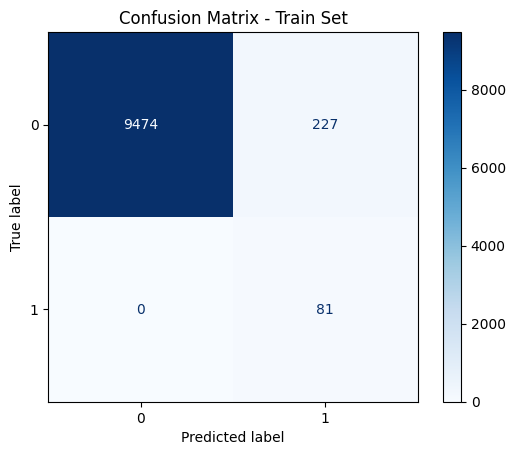

In [50]:
# Train evaluation
evaluate_model(y_train, y_pred_train, y_proba_train, dataset_name="Train Set")


--- Validation Set Evaluation ---
Accuracy : 0.9734
Precision: 0.1733
Recall   : 0.8125
F1 Score : 0.2857
ROC AUC  : 0.9881

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2430
         1.0       0.17      0.81      0.29        16

    accuracy                           0.97      2446
   macro avg       0.59      0.89      0.64      2446
weighted avg       0.99      0.97      0.98      2446

Confusion Matrix (Raw Counts):
[[2368   62]
 [   3   13]]


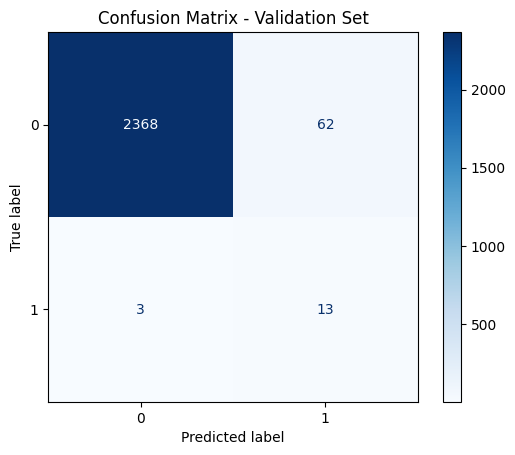

In [51]:
# Validation evaluation
evaluate_model(y_val, y_pred_val, y_proba_val, dataset_name="Validation Set")

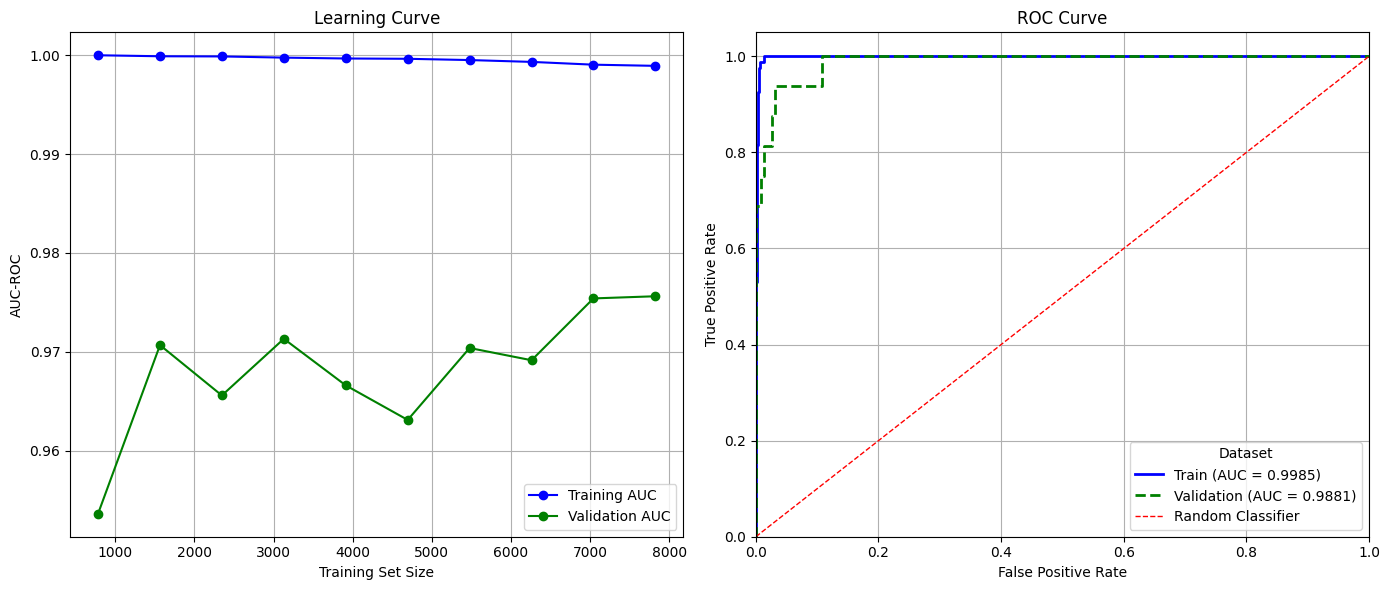

In [52]:
# Import roc_curve and learning_curve from sklearn
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_lgb_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Compute ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)

fpr_val, tpr_val, _ = roc_curve(y_val, y_proba_val)
roc_auc_val = roc_auc_score(y_val, y_proba_val)


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Learning Curve
ax[0].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training AUC')
ax[0].plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation AUC')
ax[0].set_xlabel('Training Set Size')
ax[0].set_ylabel('AUC-ROC')
ax[0].set_title('Learning Curve')
ax[0].legend()
ax[0].grid(True)

# ROC Curve
ax[1].plot(fpr_train, tpr_train, color='blue', lw=2, linestyle='-', label=f'Train (AUC = {roc_auc_train:.4f})')
ax[1].plot(fpr_val, tpr_val, color='green', lw=2, linestyle='--', label=f'Validation (AUC = {roc_auc_val:.4f})')
ax[1].plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend(title='Dataset', loc='lower right')
ax[1].grid(True)

plt.tight_layout()

In [53]:
# Get probabilities for the positive class from best model for the test dataset(X_test)
lgb_test_probs = best_lgb_model.predict_proba(X_test)[:, 1]

In [54]:
# Create output DataFrame with player_id and baseline probabilities
lgb_output_df = pd.DataFrame({
    'player_id': y_test['player_id'],
    'drafted': lgb_test_probs
})

In [55]:
# Save to CSV
lgb_output_df.to_csv("../predictions_shash/test_predictions_lgb.csv", index=False)

In [56]:
# Save the best model using joblib
import joblib
joblib.dump(best_lgb_model, '../models/best_model_lgbm_25218722_.pkl')

['../models/best_model_lgbm_25218722_.pkl']

In [57]:
model_performance_explanations = """
The LightGBM model achieved strong results, with a cross-validated ROC AUC of ~0.99 and 98.81% 
validation ROC AUC. It demonstrated excellent class separation and high recall (81.25%) for drafted 
players, ensuring most true prospects are identified.  

Although precision for the drafted class was lower (~17%) due to class imbalance, the high recall 
and AUC make LightGBM effective as a detection-first model. Compared to Random Forest, it provided 
similar overall performance but with faster training and stronger generalization, making it a 
powerful candidate for imbalanced classification problems.
"""


In [58]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [59]:
# Feature importance analysis for LightGBM
features = X_train.columns
importances = best_lgb_model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

In [60]:
print("Feature Importances:")
print(feat_df)

Feature Importances:
          Feature  Importance
17            pts         393
13         porpag         344
16            blk         340
18      height_cm         303
15           gbpm         274
2             usg         266
0              GP         260
14            bpm         186
4         DRB_per         147
8        twoP_per         140
19  Height_Impact         128
9             TPM         116
1            Ortg         102
7          FT_per          90
12            ftr          86
10         TP_per          79
11        stl_per          67
20        REB_per          47
21  FT_efficiency          45
5         AST_per          35
6          TO_per          17
3         ORB_per          11


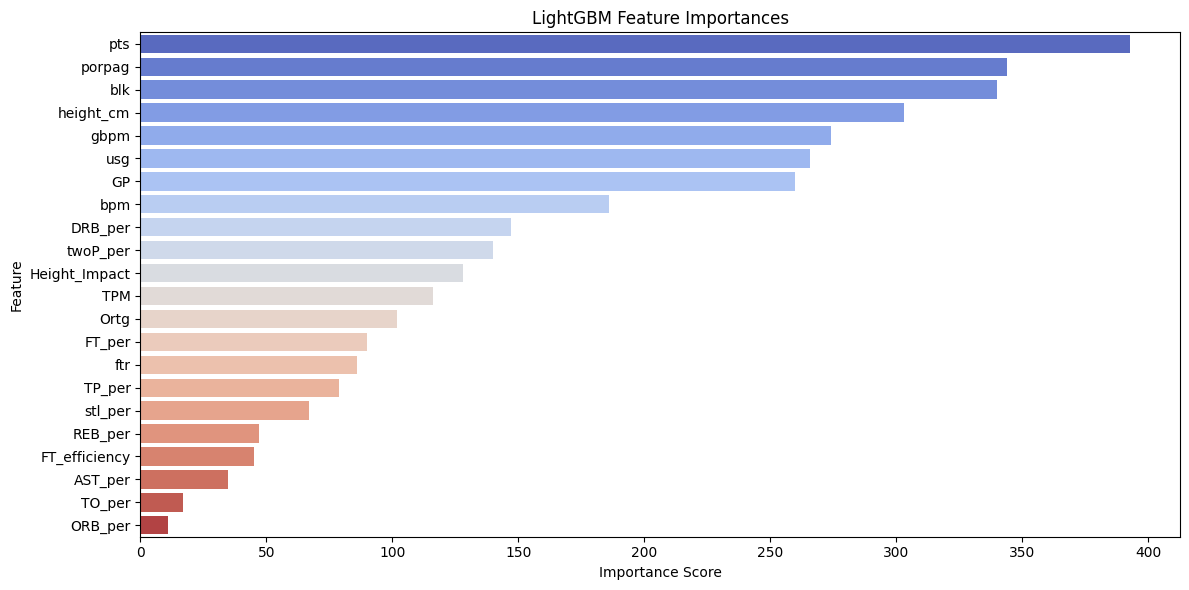

In [61]:
# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='coolwarm')
plt.title('LightGBM Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

In [62]:
business_impacts_explanations = """
The model shows that advanced performance metrics such as PORPAG, BPM, GBPM, and scoring ability 
(PTS) are the strongest predictors of draft success. This aligns well with business objectives, as 
it highlights measurable on-court impact rather than raw statistics alone. Height-adjusted metrics 
(Height_Impact) also play a significant role, reinforcing the value of considering physical profile 
in scouting.  

From a business perspective, the validation results highlight the trade-off between recall (81.2%) 
and precision (17.3%). The high recall ensures that the majority of true prospects are identified, 
minimizing the risk of overlooking future stars — a critical objective for long-term success. 
However, the low precision means that scouts will review a large number of false positives, 
increasing workload and potentially inflating short-term scouting costs. Still, this trade-off is 
favorable for the business: missing a top draft prospect is far costlier than over-investigating 
players who do not get drafted. With further optimization (e.g., adjusting thresholds, refining 
features), precision can be improved without compromising recall.  
"""


In [63]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

---
## H. Project Outcomes

In [64]:
experiment_outcome = "Hypothesis Partially Confirmed" # Training time reduced significantly but Random Forest slightly overperformed in ROC AUC and F1 Score

In [65]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [66]:
experiment_results_explanations = """

The results showed that LightGBM provided faster training compared to Random Forest and maintained 
a strong ROC AUC score, confirming its scalability and efficiency advantage. However, in terms of F1 score 
and precision, the Random Forest slightly outperformed LightGBM, especially for detecting the minority 
class (1.0). This indicates that while LightGBM is a more efficient model, its predictive performance 
on highly imbalanced classes did not surpass Random Forest in this case.

New insights gained:
- LightGBM is better suited when training speed and scalability are critical, particularly with large datasets.  
- Random Forest can sometimes capture the minority class better when class imbalance exists.  
- Precision-recall trade-offs highlight the need for further handling of imbalance (e.g., SMOTE, class weights, 
  or threshold tuning).  

Next steps:
1. Optimize the XGBoost model by tuning key hyperparameters (learning_rate, max_depth, n_estimators, subsample, colsample_bytree) to improve generalization and prevent overfitting (expected uplift: high). 
2. Incorporate class balancing techniques (scale_pos_weight or SMOTE) to better capture minority classes such as underrepresented drafted players (expected uplift: medium-high). 
3. Use XGBoost’s built-in feature importance to highlight which player attributes contribute most to draft predictions, supporting scouts with interpretable, data-driven insights (expected uplift: medium). 

"""

In [67]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)